## Preparation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
happy_2015 = pd.read_csv('2015.csv')
happy_2019 = pd.read_csv('2019.csv')

In [3]:
happy_2015 = happy_2015[['Country', 'Region']]

In [4]:
happy_2019.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [5]:
happy_2019.isna().any()

Country (region)            False
Ladder                      False
SD of Ladder                False
Positive affect              True
Negative affect              True
Social support               True
Freedom                      True
Corruption                   True
Generosity                   True
Log of GDP\nper capita       True
Healthy life\nexpectancy     True
dtype: bool

In [6]:
happy_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [7]:
happy_2019 = pd.merge(happy_2015, happy_2019, left_on = 'Country', right_on = 'Country (region)').drop('Country (region)', axis = 1)

In [8]:
happy_2019.head()

,Country,Region,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Switzerland,Western Europe,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
1,Iceland,Western Europe,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
2,Denmark,Western Europe,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
3,Norway,Western Europe,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
4,Canada,North America,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0


In [9]:
happy_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 12 columns):
Country                    150 non-null object
Region                     150 non-null object
Ladder                     150 non-null int64
SD of Ladder               150 non-null int64
Positive affect            149 non-null float64
Negative affect            149 non-null float64
Social support             149 non-null float64
Freedom                    149 non-null float64
Corruption                 142 non-null float64
Generosity                 149 non-null float64
Log of GDP
per capita      148 non-null float64
Healthy life
expectancy    145 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 15.2+ KB


## Data Visualization & Analysis

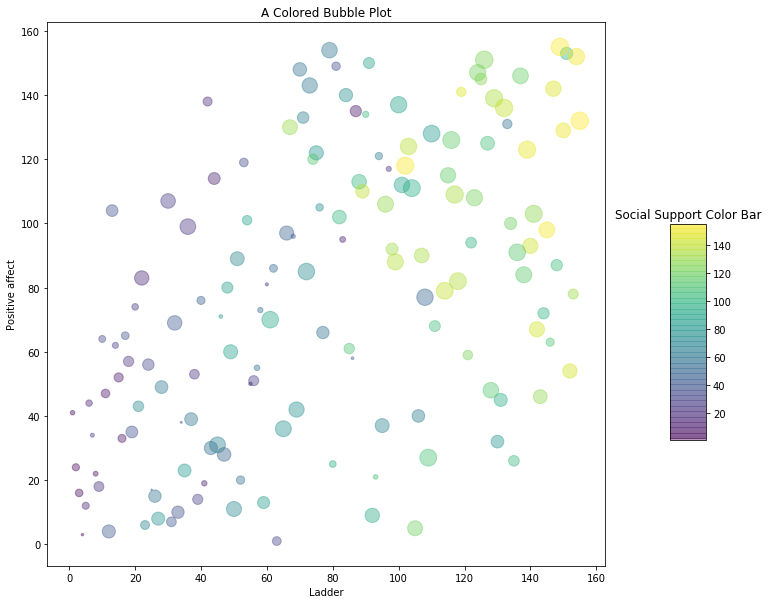

In [15]:
fig = plt.figure(figsize = (10, 10))

plt.scatter(x = happy_2019['Ladder'], y = happy_2019['Positive affect'],
           s = happy_2019['Negative affect'] * 2, alpha = 0.4, c = happy_2019['Social support'])

plt.xlabel('Ladder')
plt.ylabel('Positive affect')
plt.title('A Colored Bubble Plot')

# Adding color bar
ax_col = fig.add_axes([0.99, 0.3, 0.05, 0.3])
ax_col.set_title('Social Support Color Bar')
plt.colorbar(cax = ax_col)

plt.show()

Factors afffecting Leader Score

There were several features that affecting the Leader Score based on correlation coefficient (r) as depicted on heatmap below. Corruption has weak positive correlation (0.21) to Ladder (less life satisfaction). SD of Ladder, Positive affect, Negative affect, Freedom, and Generosity have moderate positive correlation (0.5 - 0.6) to Ladder (less life satisfaction).

   Based on the heatmap, we consider that features consistently most affecting the ladder score are Social support, Log of GDP per capita, and Health life expectancy. They have strong positive correlation (more than 0.8) to Ladder score. This means that people in countries with low life satisfaction did not think that these factors affect their overall life satisfaction / happiness so that they rank very low in the World Happiness Report.

Text(0.5, 1, 'Correlation between Ladder and Other Features')

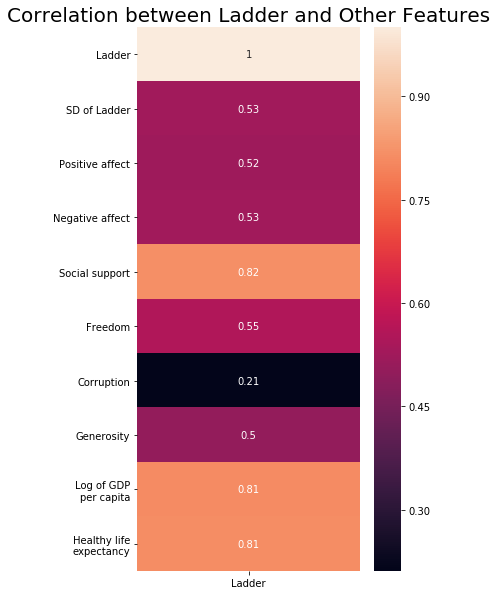

In [58]:
plt.figure(figsize = (5, 10))
sns.heatmap(happy_2019.corr()[['Ladder']], annot = True)
plt.title('Correlation between Ladder and Other Features', fontsize = 20)

Relationship between region and ladder score?

   I consider that there is weak relationship between Region and Ladder score. From boxplot below, we can conclude that some of the regions have tendency to certain rankings from the Ladder score. Regions such as Western Europe has countries mostly positioned in Top 20 which means the people have high life satisfaction. Meanwhile, most of countries in Sub-Saharan Africa are positioned below rank 100.
   
   Region such as Middle East & Northern Africa and Central & Eastern Europe
   However, some regions have too few countries hence we cannot conclude whether there is relationship between that particular region and the ladder score. For example, North America and Australia & New Zealand only have 2 countries and they are positioned within Top 20.

Text(0.5, 1.0, 'Amount of Countries in Specific Region')

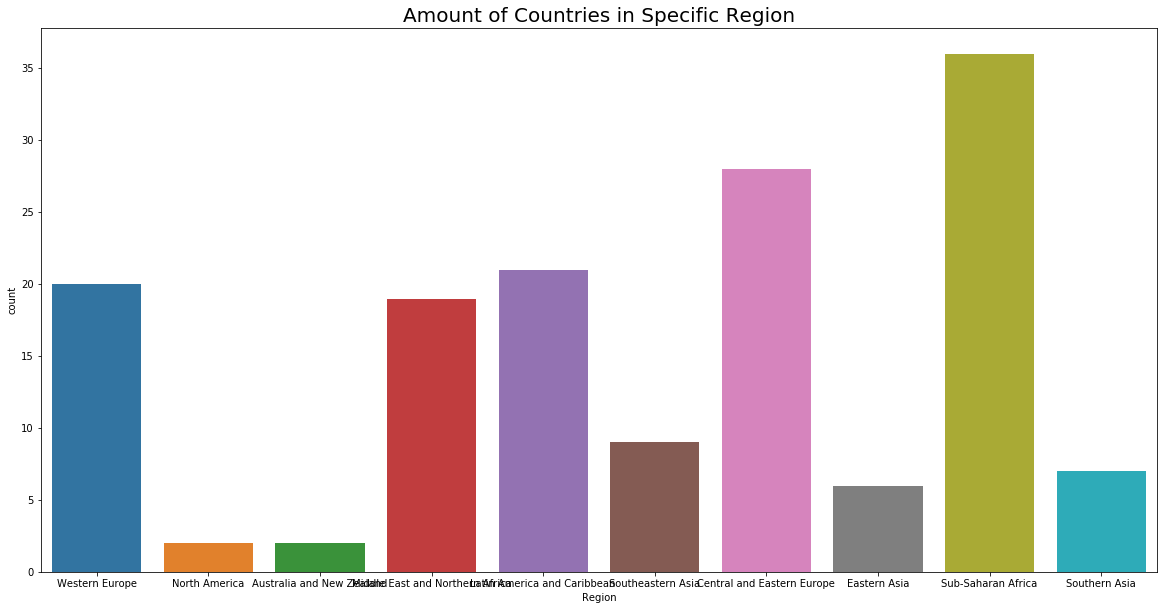

In [57]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'Region', data = happy_2019)
plt.title('Amount of Countries in Specific Region', fontsize = 20)

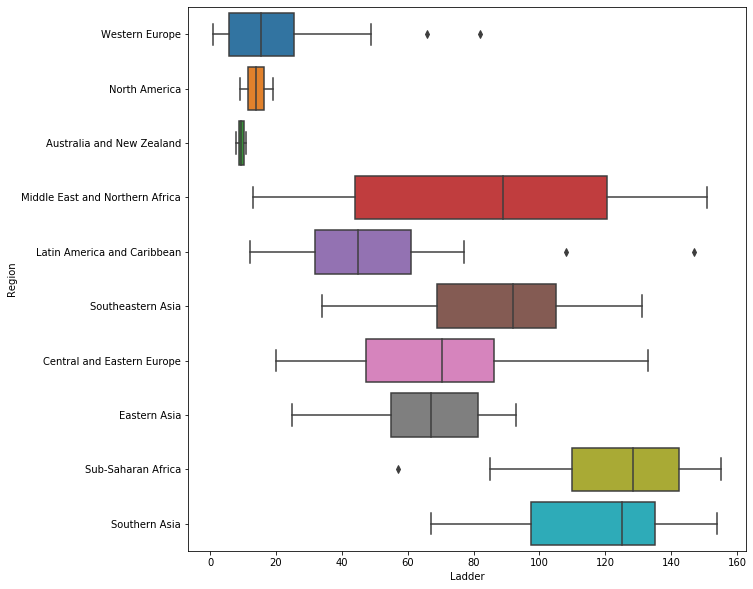

In [26]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = happy_2019, x = 'Ladder', y = 'Region', orient = 'h')

   Based on the heatmap below, we can conclude there are relationship between some of the features. Below are the explanation for features that have strong relationship (correlation > 0.6):<br>
   a. Positive affect - Freedom (0.68)<br>
We assume that relationship between these two features is that people who have freedom in their life, that person will have more positive emotions which affects their overall life happiness / satisfaction.<br> 
   b. Negative affect - Social support (0.64)<br>
       We assume that relationship between these two features is that people who have negative emotions will feel happier / more satisfy with their life if there is enough social support from their surroundings.<br>
   c. Social support - Log of GDP per capita (0.77)<br>
   We assume that relationship between these two features is that the more social support a country has will contribute to more GDP per capita of that country which affects their overall life happiness / satisfaction.<br>
   d. Social support - Healthy life expectancy (0.74)<br>
   We assume that relationship between these two features is that people who has more social support from surroundings will have better healthy life expectancy.<br>
   e. Log of GDP per capita - Healthy life expectancy (0.85)<br> 
   We assume that relationship between these two features is that the more GDP per capita a country has, healthy life expectancy of the country will increase which affects their overall life happiness / satisfaction and vice versa.

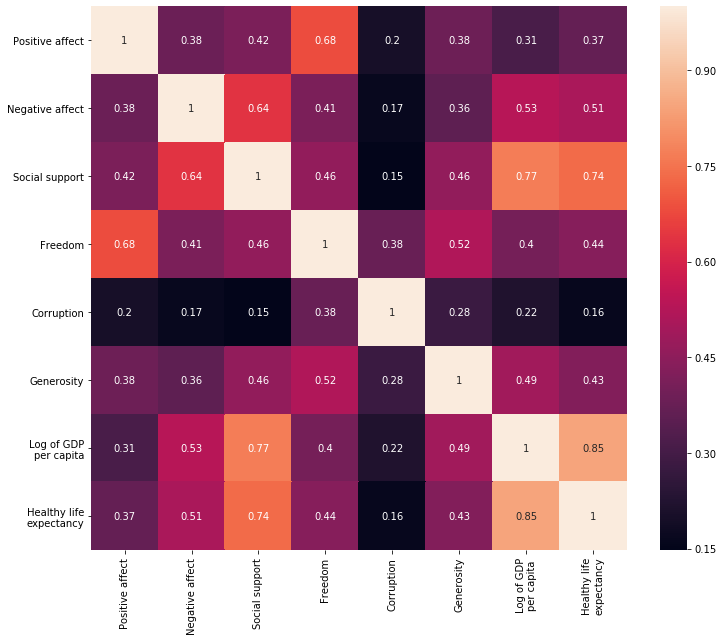

In [48]:
plt.figure(figsize = (12, 10))
happy_2019.corr()
sns.heatmap(happy_2019.corr().iloc[2:, 2:], annot = True)